In [2]:
library(tidyverse)

In [51]:
#sets up the nessesary categories
df <- read_csv("Combined Probability.csv", col_types = cols(`X1` = col_double(),Category = col_factor(), `Current Channel` = col_factor(), `Current Video` = col_factor(), `Current Views` = col_double(),`Next Channel` = col_character(), Amount = col_double(), CHANNEL_TITLE = col_factor(), `Next Category` = col_factor()))%>%
select(-`X1`)
#df <- df %>% select(Category,Current.Views,Amount,Next.Category)
head(df)

Warning message:
"Missing column names filled in: 'X1' [1]"

Category,Current Channel,Current Video,Current Views,Next Channel,Amount,CHANNEL_TITLE,Next Category
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Michael Knowles,4,Michael Knowles,ReligiousConservative
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,Lewis Howes,1,NA,NA
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,PatrickCoffin.media,1,NA,NA
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,YAFTV,2,YAFTV,AntiSJW
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,HooverInstitution,1,HooverInstitution,Libertarian
PartisanRight,Michael Knowles,Too Few Problems | Ep. 549,10897,The New School,1,NA,NA


In [52]:
df %>% filter( !is.na(`Next Category`)) %>% mutate(Impressions = `Current Views`*Amount) %>%
group_by(Category) %>% summarize(`Impressions Available`= sum(Impressions)) %>% arrange(desc(`Impressions Available`))

Category,Impressions Available
LateNightTalkShow,1330328599
Educational,235156052
PartisanLeft,206461828
SocialJustice,176994185
AntiSJW,75884211
ManoelAltLite,74802106
Mainstream News,64696505
Provocateur,45005255
AntiTheist,44713369
MissingLinkMedia,39335260


In [74]:
#What do each Category send their most impressions to
df %>% filter(!is.na(`Next Category`)) %>% mutate(Impressions = `Current Views` * Amount) %>%
group_by(Category) %>% filter(Impressions == max(Impressions), Category != "LateNightTalkShow",`Next Category` != "LateNightTalkShow") %>% 
select(Category, `Next Category`,`Impressions`) %>% arrange(desc(Impressions)) %>% rename("Max Impressions" = "Impressions")

Category,Next Category,Max Impressions
Educational,MissingLinkMedia,48556521
AntiSJW,AntiSJW,23230095
ManoelAltLite,PartisanRight,10106264
MissingLinkMedia,MissingLinkMedia,10062279
Mainstream News,Mainstream News,9313005
Socialist,SocialJustice,6098045
PartisanRight,PartisanRight,5593840
AntiTheist,AntiTheist,4950715
ManoelAltRight,AntiSJW,3590656
Libertarian,PartisanRight,3195620


In [75]:
#What do each Category send their most impressions to
df %>% filter(!is.na(`Next Category`)) %>% mutate(Impressions = `Current Views` * Amount) %>%
group_by(Category) %>% filter(Impressions == min(Impressions), Category != "LateNightTalkShow",`Next Category` != "LateNightTalkShow") %>% 
select(Category, `Next Category`,`Impressions`) %>% arrange(desc(Impressions)) %>% rename("Min Impressions" = "Impressions")

Category,Next Category,Min Impressions
AntiWhiteness,AntiWhiteness,4616
AntiWhiteness,PartisanLeft,4616
AntiWhiteness,SocialJustice,4616
MRA,MRA,686
Provocateur,PartisanRight,606
Provocateur,Libertarian,606
ManoelAltRight,AntiSJW,553
ManoelAltRight,PartisanRight,553
Conspiracy,Conspiracy,377
WhiteIdentitarian,PartisanRight,237


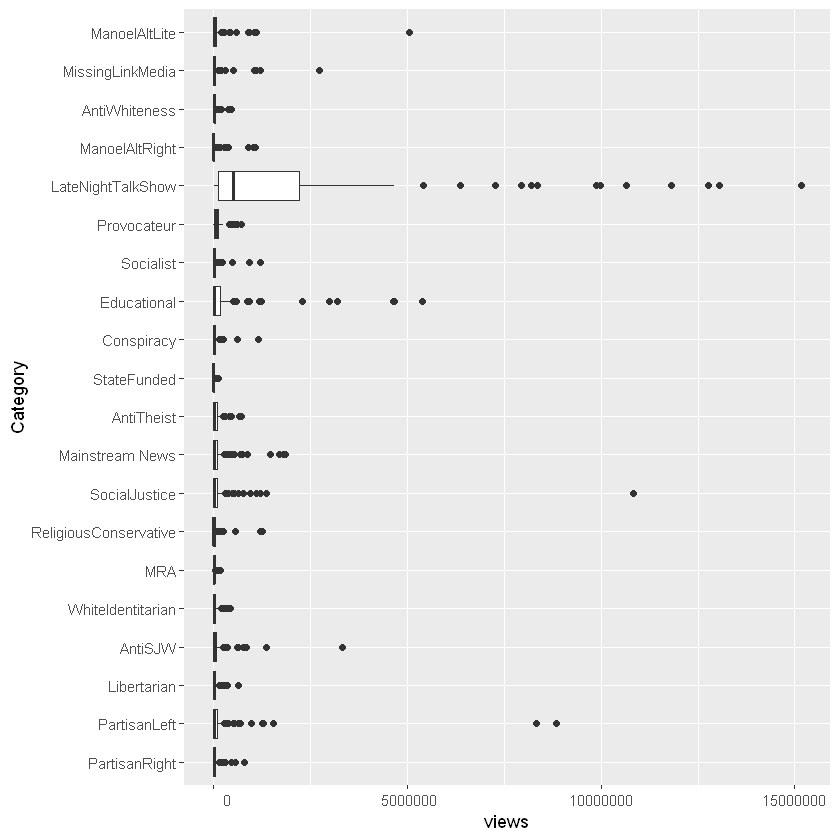

In [91]:
#distribution of views with LateNightTalkShow
df %>% group_by(Category,`Current Video`) %>% summarize(views = mean(`Current Views`)) %>%
ungroup() %>% ggplot(aes(x= Category, y=views)) + geom_boxplot() + coord_flip() +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

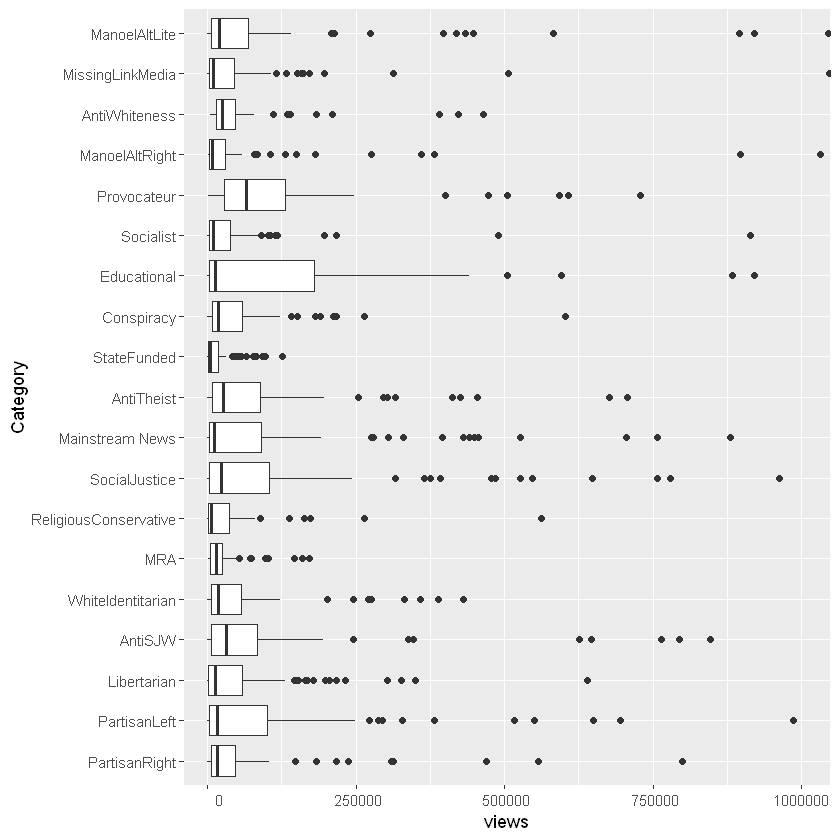

In [112]:
df %>%filter(Category != "LateNightTalkShow") %>% group_by(Category,`Current Video`) %>% summarize(views = mean(`Current Views`)) %>%
ungroup() %>% ggplot(aes(x= Category, y=views)) + geom_boxplot() + coord_flip(ylim = c(10000,1000000)) +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

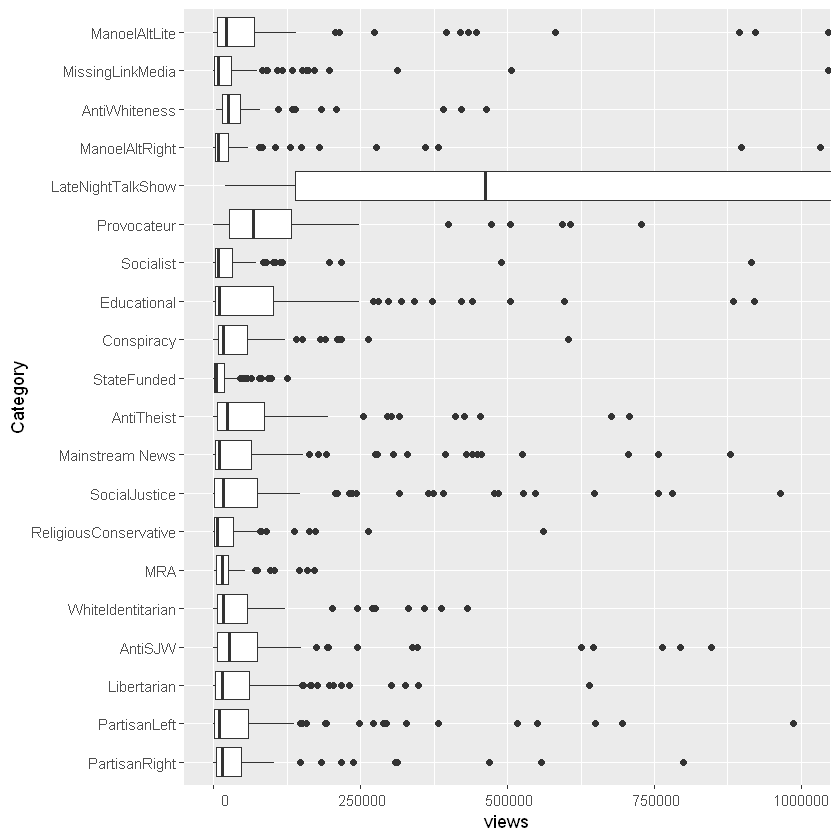

In [115]:
#views under 1 Million
df %>% ggplot(aes(x= Category, y = `Current Views`)) + geom_boxplot() + coord_flip(ylim = c(0,1000000)) + scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) + ylab("views")